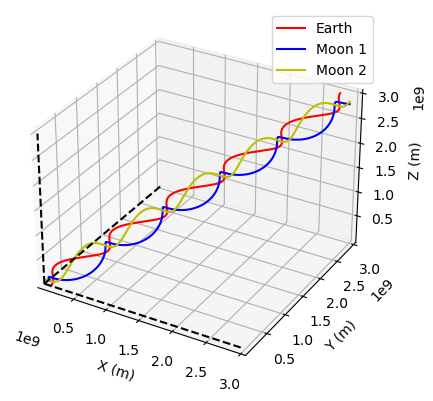

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 6.67430e-11  # Constante gravitacional, en m^3/(kg*s^2)

# Parámetros iniciales
m1 = 1e24  # Masa del cuerpo 1 (por ejemplo, la Tierra) en kg
m2 = 1e24  # Masa del cuerpo 2 (por ejemplo, la Luna) en kg
m3 = 1e24  # Masa del cuerpo 2 (por ejemplo, la Luna) en kg

# Posiciones iniciales (en metros)
r1 = np.array([100000e3, 0.0, 0.0])  # Cuerpo 1
r2 = np.array([0.0, 100000e3, 0.0])  # Cuerpo 2
r3 = np.array([0.0, 0.0, 100000e3])  # Cuerpo 2

# Velocidades iniciales (en metros/segundo)
v1 = np.array([0.0, 1000.0, 0.0])
v2 = np.array([0.0, 0.0, 1000.0])  # Velocidad inicial orbital del cuerpo 2
v3 = np.array([1000.0, 0.0, 0.0])  # Velocidad inicial orbital del cuerpo 2

# Parámetros de la simulación
t = 3600*24*100 # Paso de tiempo (1 hora) en segundos
steps = 100000 # Número de pasos de tiempo
dt = t/steps
# Listas para almacenar las posiciones
x1, y1, z1 = [], [], []
x2, y2, z2 = [], [], []
x3, y3, z3 = [], [], []

# Simulación
for _ in range(steps):
    # Vector de separación
    r12 = r2 - r1
    r13 = r3 - r1
    r23 = r3 - r2
    distance12 = np.linalg.norm(r12)
    distance13 = np.linalg.norm(r13)
    distance23 = np.linalg.norm(r23)
    force_magnitude12 = G * m1 * m2 / distance12**2
    force_magnitude13 = G * m1 * m3 / distance13**2
    force_magnitude23 = G * m2 * m3 / distance23**2
    force12 = force_magnitude12 * (r12 / distance12)
    force13 = force_magnitude13 * (r13 / distance13)
    force23 = force_magnitude23 * (r23 / distance23)
    
    # Actualizar velocidades (segunda ley de Newton)
    v1 += (force12 + force13) / m1 * dt
    v2 += (-force12 + force23) / m2 * dt
    v3 += (-force13 - force23) / m3 * dt
    
    # Actualizar posiciones
    r1 += v1 * dt
    r2 += v2 * dt
    r3 += v3 * dt
    
    # Guardar posiciones
    x1.append(r1[0])
    y1.append(r1[1])
    z1.append(r1[2])
    x2.append(r2[0])
    y2.append(r2[1])
    z2.append(r2[2])
    x3.append(r3[0])
    y3.append(r3[1])
    z3.append(r3[2])


ax = plt.figure().add_subplot(projection='3d')

# Graficar las trayectorias
ax.plot(x1, y1, z1, 'r-', label='Earth')  # Trayectoria del cuerpo 1
ax.plot(x2, y2, z2, 'b-', label='Moon 1')  # Trayectoria del cuerpo 2
ax.plot(x3, y3, z3, 'y-', label='Moon 2')  # Trayectoria del cuerpo 3

# Agregar etiquetas de los ejes
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

# Configurar los límites de los ejes
ax.set_xlim([min(min(x1), min(x2), min(x3)), max(max(x1), max(x2), max(x3))])
ax.set_ylim([min(min(y1), min(y2), min(y3)), max(max(y1), max(y2), max(y3))])
ax.set_zlim([min(min(z1), min(z2), min(z3)), max(max(z1), max(z2), max(z3))])

# Dibujar los ejes principales en su posición cero
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], [0, 0], 'k--')  # Eje X
ax.plot([0, 0], [ax.get_ylim()[0], ax.get_ylim()[1]], [0, 0], 'k--')  # Eje Y
ax.plot([0, 0], [0, 0], [ax.get_zlim()[0], ax.get_zlim()[1]], 'k--')  # Eje Z

# Agregar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

/Users/javiercastillouvina/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


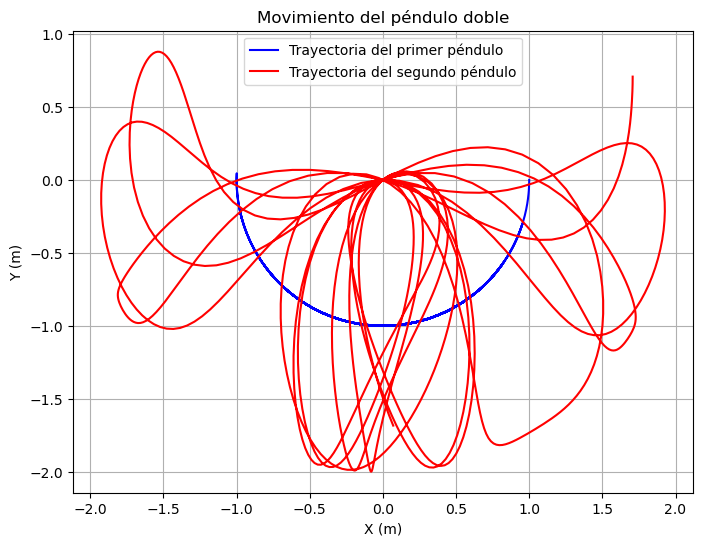

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del péndulo doble
g = 9.81       # Aceleración gravitacional (m/s^2)
L1 = 1.0       # Longitud del primer péndulo (m)
L2 = 1.0       # Longitud del segundo péndulo (m)
m1 = 1.0       # Masa del primer péndulo (kg)
m2 = 1.0       # Masa del segundo péndulo (kg)

# Función para las ecuaciones de movimiento
def equations(t, y):
    theta1, z1, theta2, z2 = y  # y = [theta1, dtheta1/dt, theta2, dtheta2/dt]
    
    delta = theta2 - theta1
    denom1 = (m1 + m2) * L1 - m2 * L1 * np.cos(delta) ** 2
    denom2 = (L2 / L1) * denom1
    
    # Aceleraciones angulares
    dtheta1_dt = z1
    dz1_dt = (m2 * L1 * z1 ** 2 * np.sin(delta) * np.cos(delta) +
              m2 * g * np.sin(theta2) * np.cos(delta) +
              m2 * L2 * z2 ** 2 * np.sin(delta) -
              (m1 + m2) * g * np.sin(theta1)) / denom1
    
    dtheta2_dt = z2
    dz2_dt = (-m2 * L2 * z2 ** 2 * np.sin(delta) * np.cos(delta) +
              (m1 + m2) * g * np.sin(theta1) * np.cos(delta) -
              (m1 + m2) * L1 * z1 ** 2 * np.sin(delta) -
              (m1 + m2) * g * np.sin(theta2)) / denom2
    
    return [dtheta1_dt, dz1_dt, dtheta2_dt, dz2_dt]

# Condiciones iniciales
theta1_0 = np.pi / 2  # Ángulo inicial del primer péndulo (rad)
theta2_0 = np.pi / 4  # Ángulo inicial del segundo péndulo (rad)
z1_0 = 0.0            # Velocidad angular inicial del primer péndulo (rad/s)
z2_0 = 0.0            # Velocidad angular inicial del segundo péndulo (rad/s)

y0 = [theta1_0, z1_0, theta2_0, z2_0]

# Tiempo de simulación
t_span = (0, 20)  # Simulación de 0 a 20 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

# Extraer ángulos y calcular posiciones
theta1, theta2 = sol.y[0], sol.y[2]
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 + L2 * np.cos(theta2)

# Graficar la trayectoria de los péndulos
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label="Trayectoria del primer péndulo", color='b')
plt.plot(x2, y2, label="Trayectoria del segundo péndulo", color='r')
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Movimiento del péndulo doble")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()
